In [222]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
from astropy.io import fits
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
import spacepy.pycdf as cdf

In [5]:
pip install spacepy

In [75]:
pip install matplotlib basemap pandas

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install netCDF4

## Plot 1

In [362]:
# Open the NetCDF file
dataset = nc.Dataset('C:\\Users\\Owner\\Downloads\\emars_v1.0_anal_mean_MY25_Ls060-090.nc', 'r')

In [363]:
# List all variables
print(dataset.variables.keys())

dict_keys(['Ls', 'MY', 'Surface_geopotential', 'T', 'U', 'V', 'ak', 'bk', 'earth_day', 'earth_hour', 'earth_minute', 'earth_month', 'earth_second', 'earth_year', 'emars_sol', 'lat', 'latu', 'lon', 'lonv', 'macda_sol', 'mars_hour', 'mars_soy', 'pfull', 'phalf', 'ps', 'time'])


In [364]:
# Defining variables
latitude_og = dataset.variables['lat'][:]
longitude_og = dataset.variables['lon']
temperature_og = dataset.variables['T'][0, 0, :, :]

In [365]:
# Turning variables into numpy arrays
longitude_og = np.array(longitude_og)
latitude_og = np.array(latitude_og)
temperature_og = np.array(temperature_og)

In [366]:
longitude_og = np.where(longitude_og > 180, longitude_og - 360, longitude_og)

In [367]:
latitude = np.linspace(-90, 90, 36)  # Evenly spaced latitude values
longitude = np.linspace(-180, 180, 60)  # Evenly spaced longitude values

# Generate a meshgrid
lon_grid, lat_grid = np.meshgrid(longitude, latitude)

# Test that all variables have the same shape
print(lon_grid.shape)
print(lat_grid.shape)
print(temperature_og.shape)

(36, 60)
(36, 60)
(36, 60)


In [368]:
# Define longitude and latitude bounds
llcrnrlat = max(-85, min(latitude) - 5) # Should be within -90 to 90
urcrnrlat = min(85, max(latitude) + 5)

llcrnrlon = min(longitude) - 5  # Should be within -180 to 180
urcrnrlon = max(longitude) + 5

# Create basemap
m = Basemap(projection='merc', llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, resolution='i')

In [369]:
# Define x and y variables in basemap
x, y = m(lon_grid, lat_grid)

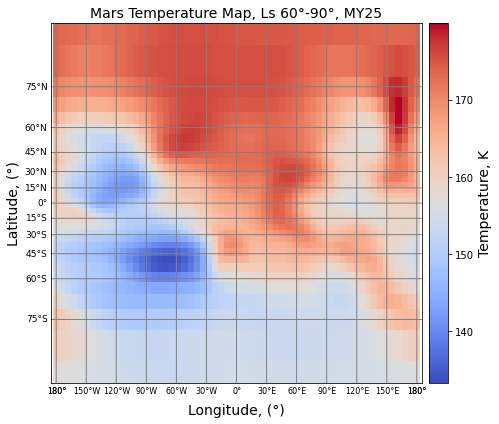

In [372]:
# Plot using pcolormesh
plt.figure(figsize=(10, 6))
m.pcolormesh(lon_grid, lat_grid, temperature_og, cmap='coolwarm', shading='auto', latlon=True)

# Add latitude and longitude grid lines
m.drawparallels(np.arange(-90., 91., 15.), labels=[1, 0, 0, 0], color='gray', dashes=[1, 0], fontsize=9)  # Latitude lines
m.drawmeridians(np.arange(-180., 181., 30.), labels=[0, 0, 0, 1], color='gray', dashes=[1, 0], fontsize=8)  # Longitude lines

# Create a colorbar
cbar= m.colorbar(label="Temperature")
cbar.set_label('Temperature, K', fontsize=14)

# Create plot labels
plt.title("Mars Temperature Map, Ls 60°-90°, MY25", fontsize=14)
plt.xlabel("Longitude, (°)", labelpad=20, fontsize=14)
plt.ylabel("Latitude, (°)", labelpad=30, fontsize=14)
plt.tight_layout()
plt.savefig('060-090.jpg')
plt.show()

## Plot 2

In [373]:
# Open the NetCDF file
dataset_2 = nc.Dataset('C:\\Users\\Owner\\Downloads\\emars_v1.0_anal_mean_MY25_Ls240-270.nc', 'r')

In [374]:
# Defining variables
latitude_og_2 = dataset_2.variables['lat'][:]
longitude_og_2 = dataset_2.variables['lon']
temperature_og_2 = dataset_2.variables['T'][0, 0, :, :]

In [375]:
# Turning variables into numpy arrays
longitude_og_2 = np.array(longitude_og_2)
latitude_og_2 = np.array(latitude_og_2)
temperature_og_2 = np.array(temperature_og_2)

In [376]:
longitude_og_2 = np.where(longitude_og_2 > 180, longitude_og_2 - 360, longitude_og_2)

In [377]:
latitude_2 = np.linspace(-90, 90, 36)  # Evenly spaced latitude values
longitude_2 = np.linspace(-180, 180, 60)  # Evenly spaced longitude values

# Generate a meshgrid
lon_grid_2, lat_grid_2 = np.meshgrid(longitude_2, latitude_2)

# Test that all variables have the same shape
print(lon_grid_2.shape)
print(lat_grid_2.shape)
print(temperature_og_2.shape)

(36, 60)
(36, 60)
(36, 60)


In [378]:
# Define longitude and latitude bounds
llcrnrlat_2 = max(-85, min(latitude_2) - 5) # Should be within -90 to 90
urcrnrlat_2 = min(85, max(latitude_2) + 5)

llcrnrlon_2 = min(longitude_2) - 5  # Should be within -180 to 180
urcrnrlon_2 = max(longitude_2) + 5

In [379]:
# Create a basemap
m2 = Basemap(projection='merc', llcrnrlat=llcrnrlat_2, urcrnrlat=urcrnrlat_2, llcrnrlon=llcrnrlon_2, urcrnrlon=urcrnrlon_2, resolution='i')

In [380]:
# Define x and y variables in basemap
x2, y2 = m2(lon_grid_2, lat_grid_2)

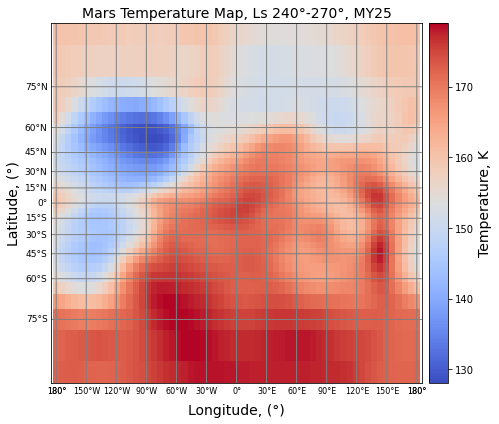

In [381]:
# Plot using pcolormesh
plt.figure(figsize=(10, 6))
m2.pcolormesh(lon_grid_2, lat_grid_2, temperature_og_2, cmap='coolwarm', shading='auto', latlon=True)

# Add latitude and longitude grid lines
m2.drawparallels(np.arange(-90., 91., 15.), labels=[1, 0, 0, 0], color='gray', dashes=[1, 0], fontsize=9)  # Latitude lines
m2.drawmeridians(np.arange(-180., 181., 30.), labels=[0, 0, 0, 1], color='gray', dashes=[1, 0], fontsize=8)  # Longitude lines

# Create a colorbar
cbar2= m2.colorbar(label="Temperature")
cbar2.set_label('Temperature, K', fontsize=14)

# Create plot labels
plt.title("Mars Temperature Map, Ls 240°-270°, MY25", fontsize=14)
plt.xlabel("Longitude, (°)", labelpad=20, fontsize=14)
plt.ylabel("Latitude, (°)", labelpad=30, fontsize=14)
plt.tight_layout()
plt.savefig('240-270.jpg')
plt.show()